<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from datetime import datetime
import matplotlib.pyplot as plt

# local file upload
from google.colab import files
upLoadFile=files.upload()

Saving diabetes.csv to diabetes (3).csv


In [ ]:
load_data = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
np.random.shuffle(load_data)
print('Load Data: ', load_data.shape)

# Load데이터중 30%는 test데이터로 분리
seperation_rate = 0.3 
test_data_num = int(len(load_data) * seperation_rate)
test_Data = load_data[0:test_data_num]
train_Data = load_data[test_data_num:]

train_x = train_Data[:,0:-1]
train_t = train_Data[:,[-1]]

test_x = test_Data[:,0:-1]
test_t = test_Data[:,[-1]]

print('train X: ', train_x.shape)
print('test X: ', test_x.shape)


Load Data:  (759, 9)
train X:  (532, 8)
test X:  (227, 8)


모델구성

In [ ]:
model = Sequential()
model.add(Dense(train_t.shape[1], input_shape=(train_x.shape[1],), activation='sigmoid'))   # 노드가 1개인 출력층생성

모델컴파일

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
startTime = datetime.now()
hist = model.fit(train_x, train_t, epochs=500, validation_split=0.2, verbose=2)
endTime=datetime.now()
print('Time: ', endTime-startTime)

Epoch 1/500
14/14 - 0s - loss: 0.8153 - accuracy: 0.3459 - val_loss: 0.7828 - val_accuracy: 0.3551
Epoch 2/500
14/14 - 0s - loss: 0.7986 - accuracy: 0.3553 - val_loss: 0.7678 - val_accuracy: 0.3925
Epoch 3/500
14/14 - 0s - loss: 0.7835 - accuracy: 0.3741 - val_loss: 0.7545 - val_accuracy: 0.4486
Epoch 4/500
14/14 - 0s - loss: 0.7699 - accuracy: 0.4000 - val_loss: 0.7419 - val_accuracy: 0.4579
Epoch 5/500
14/14 - 0s - loss: 0.7569 - accuracy: 0.4259 - val_loss: 0.7321 - val_accuracy: 0.4486
Epoch 6/500
14/14 - 0s - loss: 0.7467 - accuracy: 0.4329 - val_loss: 0.7238 - val_accuracy: 0.4766
Epoch 7/500
14/14 - 0s - loss: 0.7379 - accuracy: 0.4447 - val_loss: 0.7163 - val_accuracy: 0.4953
Epoch 8/500
14/14 - 0s - loss: 0.7298 - accuracy: 0.4659 - val_loss: 0.7099 - val_accuracy: 0.5140
Epoch 9/500
14/14 - 0s - loss: 0.7228 - accuracy: 0.4776 - val_loss: 0.7036 - val_accuracy: 0.4860
Epoch 10/500
14/14 - 0s - loss: 0.7160 - accuracy: 0.5035 - val_loss: 0.6987 - val_accuracy: 0.5234
Epoch 11/

모델평가

In [ ]:
model.evaluate(test_x, test_t)

8/8 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7489


[0.49721866846084595, 0.7488986849784851]

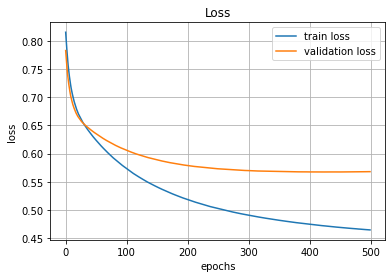

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

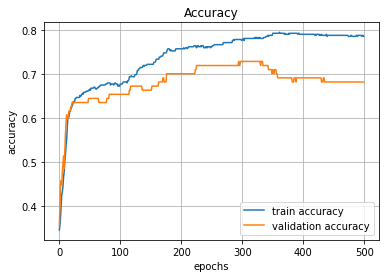

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()